In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import plotly.express as px
import molplotly

# PCA of 2D descriptor data

In [2]:
df_2D_desc = pd.read_csv (r'C:\documenten hier\2D_desc_ccr5.csv')
df_2D_desc.head()

InChIKey  MaxEStateIndex  MinEStateIndex  \
0  AAEHNXBQLULMSR-UHFFFAOYSA-N       13.241994        0.109151   
1  AAEUXJDQWJJVCV-UHFFFAOYSA-N       13.920921       -2.149683   
2  AAFIDRUCDKVRAX-UHFFFAOYSA-N       13.032473       -0.705418   
3  AANOMZQEAPYXAF-UHFFFAOYSA-N       12.666802       -0.308762   
4  AAOGRFLITNLSTM-UHFFFAOYSA-N       13.024665       -3.538929   

   MaxAbsEStateIndex  MinAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  \
0          13.241994           0.109151  0.462503  459.033         427.785   
1          13.920921           0.031373  0.326771  447.572         410.276   
2          13.032473           0.109347  0.432016  583.516         551.260   
3          12.666802           0.005046  0.613005  431.540         402.308   
4          13.024665           0.088523  0.622512  459.612         426.348   

   ExactMolWt  NumValenceElectrons  ...  fr_sulfone  fr_term_acetylene  \
0  458.212491                  170  ...           0                  0   
1  447.262088                  178  ...           0                  0   
2  582.180061                  210  ...           0                  0   
3  431.232125                  166  ...           0                  0   
4  459.219178                  174  ...           0                  0   

   fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0             0            0            0             0                 0   
1             0            0            0             0                 0   
2             0            0            0             0                 0   
3             0            0            0             0                 0   
4             0            0            0             0                 0   

   fr_urea                                           scaffold  \
0        0  O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...   
1        0                      O=C(c1cc[nH]c1)C1CCCC2CCCCC21   
2        0  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...   
3        0        O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1   
4        0           O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1   

                                              smiles  
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...  
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...  
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...  
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...  
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...  

[5 rows x 211 columns]

In [3]:
features = list(df_2D_desc.columns.values)
features.remove('InChIKey')
features.remove('scaffold')
features.remove('smiles')

z = df_2D_desc.loc[ :,features].values # stores all values as numpy.ndarray
y = df_2D_desc.loc[:,['InChIKey']].values


In [4]:
x = StandardScaler().fit_transform(z)

In [5]:
pd.DataFrame(data = x, columns= features).head()

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0        0.208626        0.879700           0.208626          -0.041399   
1        0.549775       -0.485845           0.549775          -0.549532   
2        0.103345        0.387264           0.103345          -0.040124   
3       -0.080399        0.627057          -0.080399          -0.721533   
4        0.099421       -1.325693           0.099421          -0.176167   

        qed     MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.390443 -0.831010       -0.806363   -0.834034            -0.873924   
1 -0.529317 -0.960914       -1.018445   -0.958298            -0.645156   
2  0.183858  0.579932        0.689260    0.572737             0.269920   
3  1.410290 -1.142627       -1.114960   -1.140204            -0.988309   
4  1.474707 -0.824447       -0.823769   -0.822610            -0.759540   

   NumRadicalElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                  0.0  ...   -0.121684     -0.426641   -0.262715   
1                  0.0  ...   -0.121684     -0.426641   -0.262715   
2                  0.0  ...   -0.121684     -0.426641   -0.262715   
3                  0.0  ...   -0.121684     -0.426641   -0.262715   
4                  0.0  ...   -0.121684      2.327593   -0.262715   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                0.0     -0.085947    -0.091203          0.0     -0.209807   
1                0.0     -0.085947    -0.091203          0.0     -0.209807   
2                0.0     -0.085947    -0.091203          0.0     -0.209807   
3                0.0     -0.085947    -0.091203          0.0     -0.209807   
4                0.0     -0.085947    -0.091203          0.0     -0.209807   

   fr_unbrch_alkane   fr_urea  
0         -0.127545 -0.344982  
1         -0.127545 -0.344982  
2         -0.127545 -0.344982  
3         -0.127545 -0.344982  
4         -0.127545 -0.344982  

[5 rows x 208 columns]

In [6]:
pca = PCA(n_components=2) # set the amount of dimensions to 2

In [7]:
principalComponents = pca.fit_transform(x)


In [8]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components

In [9]:
principalDf.head()

principal component 1  principal component 2
0              -4.798561              -1.901528
1              -1.954482              -0.693577
2               1.893621               2.473518
3              -6.271265               1.006072
4              -4.290759               3.327767

In [10]:
finalDf = pd.concat([principalDf, df_2D_desc[['InChIKey']], df_2D_desc[['scaffold']], df_2D_desc[['smiles']]], axis = 1)
finalDf['scaffold'] = df_2D_desc['scaffold'].astype(str)
finalDf['smiles'] = df_2D_desc['smiles'].astype(str)
finalDf.head(5)

principal component 1  principal component 2                     InChIKey  \
0              -4.798561              -1.901528  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1              -1.954482              -0.693577  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2               1.893621               2.473518  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3              -6.271265               1.006072  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4              -4.290759               3.327767  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                            scaffold  \
0  O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...   
1                      O=C(c1cc[nH]c1)C1CCCC2CCCCC21   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...   
3        O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1   
4           O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1   

                                              smiles  
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...  
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...  
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...  
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...  
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...

In [11]:
print(pca.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca.explained_variance_ratio_) # total variance explained by first and second principal component

[36.22439944 15.13823513]
[0.19056736 0.07963841]


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

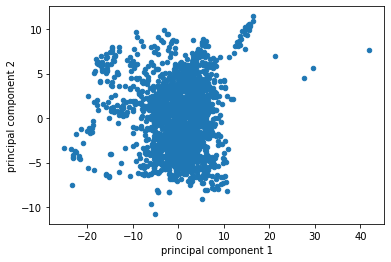

In [12]:
finalDf.plot.scatter(x= 'principal component 1', y='principal component 2')

In [13]:
series = pd.value_counts(finalDf.scaffold)
mask = (series.lt(10))
finalDf['scaffold_grouped'] = np.where(finalDf['scaffold'].isin(series[mask].index),'Other',finalDf['scaffold'])


In [14]:
# The following symbols will be used in all scatterplots
symbols = ['circle', 'square', 'diamond', 'cross', 'x',  'pentagon', 'hexagram', 'star',
           'diamond', 'hourglass', 'bowtie']

In [15]:
df = pd.read_csv (r'C:\documenten hier\ccr5_data.csv')
df.head()
finalDf['Activity'] = df['pchembl_value_Mean']
finalDf['Activity'] = finalDf['Activity'].fillna(0)

In [16]:
fig_2D = px.scatter(finalDf, x="principal component 1", y="principal component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                      },
                   # size = "Activity",
                    title = 'PCA on 2D descriptor data after scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
fig_2D.update_layout(plot_bgcolor='White')
#fig_2D.show()
app_scatter = molplotly.add_molecules(fig=fig_2D,
                                      df=finalDf,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9501, height=800)


In [17]:

fig_2D_2 = px.scatter(finalDf, x="principal component 1", y="principal component 2",
                    color = "Activity",
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'Activity': 'Activity'},
                    render_mode='SVG',
                    title = 'PCA on 2D descriptor data after scaling',
                                      width=1000,
                                      height=800,
                    # symbol='scaffold_grouped',
                    symbol_sequence = symbols,)
fig_2D_2.update_layout(plot_bgcolor='White')
#fig_2D_2.show()
app_scatter = molplotly.add_molecules(fig=fig_2D_2,
                                      df=finalDf,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9502, height=800)

# PCA on morgan fingerprint data

In [18]:
df_morgan = pd.read_csv (r'C:\documenten hier\MorganFp_scaffold_ccr5_1024.csv')
df_morgan.head()

InChIKey  0  1  2  3  4  5  6  7  8  ...  1015  1016  \
0  AAEHNXBQLULMSR-UHFFFAOYSA-N  1  0  0  0  0  0  0  0  0  ...     0     0   
1  AAEUXJDQWJJVCV-UHFFFAOYSA-N  0  0  0  0  0  0  0  0  0  ...     0     0   
2  AAFIDRUCDKVRAX-UHFFFAOYSA-N  0  0  0  0  0  0  0  0  0  ...     0     0   
3  AANOMZQEAPYXAF-UHFFFAOYSA-N  0  1  0  0  0  0  0  0  0  ...     0     0   
4  AAOGRFLITNLSTM-UHFFFAOYSA-N  1  1  0  0  0  0  0  0  1  ...     0     0   

   1017  1018  1019  1020  1021  1022  1023  \
0     0     0     1     0     0     0     0   
1     1     0     1     0     0     0     1   
2     0     0     0     0     0     0     0   
3     0     1     0     0     0     0     0   
4     0     0     1     0     1     0     0   

                                            scaffold  
0  O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...  
1                      O=C(c1cc[nH]c1)C1CCCC2CCCCC21  
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...  
3        O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1  
4           O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1  

[5 rows x 1026 columns]

In [19]:
df_morgan.dtypes

InChIKey    object
0            int64
1            int64
2            int64
3            int64
             ...  
1020         int64
1021         int64
1022         int64
1023         int64
scaffold    object
Length: 1026, dtype: object

In [20]:
type(df_morgan['InChIKey'])

pandas.core.series.Series

In [21]:
featuresM = list(df_morgan.columns.values)
featuresM.remove('InChIKey')
featuresM.remove ('scaffold')
a = df_morgan.loc[ :,featuresM].values # stores all values as numpy.ndarray
b = df_morgan.loc[:,['InChIKey']].values


In [22]:
c = StandardScaler().fit_transform(a)

In [23]:
pd.DataFrame(data = c, columns= featuresM).head()

0         1         2         3         4         5         6  \
0  2.514388 -1.206003 -0.443026 -0.329757 -0.705406 -0.370203 -0.145112   
1 -0.397711 -1.206003 -0.443026 -0.329757 -0.705406 -0.370203 -0.145112   
2 -0.397711 -1.206003 -0.443026 -0.329757 -0.705406 -0.370203 -0.145112   
3 -0.397711  0.829185 -0.443026 -0.329757 -0.705406 -0.370203 -0.145112   
4  2.514388  0.829185 -0.443026 -0.329757 -0.705406 -0.370203 -0.145112   

          7         8         9  ...      1014      1015      1016      1017  \
0 -0.342426 -0.436346 -0.215691  ... -0.282247 -0.286015 -0.172427 -0.311502   
1 -0.342426 -0.436346 -0.215691  ... -0.282247 -0.286015 -0.172427  3.210249   
2 -0.342426 -0.436346 -0.215691  ... -0.282247 -0.286015 -0.172427 -0.311502   
3 -0.342426 -0.436346 -0.215691  ... -0.282247 -0.286015 -0.172427 -0.311502   
4 -0.342426  2.291757 -0.215691  ... -0.282247 -0.286015 -0.172427 -0.311502   

       1018      1019      1020      1021      1022      1023  
0 -0.412278  0.437834 -0.165248 -0.322013 -0.235873 -0.228196  
1 -0.412278  0.437834 -0.165248 -0.322013 -0.235873  4.382203  
2 -0.412278 -2.283971 -0.165248 -0.322013 -0.235873 -0.228196  
3  2.425548 -2.283971 -0.165248 -0.322013 -0.235873 -0.228196  
4 -0.412278  0.437834 -0.165248  3.105463 -0.235873 -0.228196  

[5 rows x 1024 columns]

In [24]:
pca_M = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_M = pca_M.fit_transform(c)

In [25]:
principalDf_M = pd.DataFrame(data = principalComponents_M
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_M.head()

principal component 1  principal component 2
0               3.908456               0.330743
1              -0.931539              -3.646098
2              -4.213062              -0.963258
3               0.282878              -2.541319
4              -0.264028               8.974368

In [26]:
print(pca_M.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca_M.explained_variance_ratio_) # total variance explained by first and second principal component

[34.26576461 25.21044826]
[0.03344732 0.0246083 ]


In [27]:
df = pd.read_csv (r'C:\documenten hier\ccr5_data.csv')
df.head()

Activity_ID Quality     source            CID  \
0  AAEHNXBQLULMSR_on_P51681_WT  Medium   ChEMBL30   CHEMBL316073   
1  AAEUXJDQWJJVCV_on_P51681_WT    High  ExCAPE-DB       54726677   
2  AAFIDRUCDKVRAX_on_P51681_WT    High   ChEMBL30   CHEMBL522158   
3  AANOMZQEAPYXAF_on_P51681_WT    High   ChEMBL30  CHEMBL3263023   
4  AAOGRFLITNLSTM_on_P51681_WT    High   ChEMBL30   CHEMBL310369   

                                              SMILES    connectivity  \
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...  AAEHNXBQLULMSR   
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...  AAEUXJDQWJJVCV   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...  AAFIDRUCDKVRAX   
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...  AANOMZQEAPYXAF   
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...  AAOGRFLITNLSTM   

                      InChIKey  \
0  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                               InChI  \
0  InChI=1S/C29H31ClN2O/c30-27-13-11-25(12-14-27)...   
1  InChI=1S/C25H37NO6/c1-6-13(3)16-8-7-15-10-12(2...   
2  InChI=1S/C30H32Cl2N4O4/c31-24-9-8-22(19-25(24)...   
3  InChI=1S/C25H29N5O2/c1-19(2)32-24-9-8-21(16-22...   
4  InChI=1S/C24H33N3O4S/c1-26(32(29,30)23-11-7-4-...   

                                       InChI_AuxInfo  target_id  ...  \
0  "AuxInfo=1/0/N:21,30,20,22,29,31,19,23,28,32,4...  P51681_WT  ...   
1  "AuxInfo=1/1/N:1,11,4,14,26,2,7,6,12,9,24,10,3...  P51681_WT  ...   
2  "AuxInfo=1/1/N:29,28,30,5,27,31,4,33,34,17,19,...  P51681_WT  ...   
3  "AuxInfo=1/1/N:1,3,26,25,27,24,28,31,32,13,14,...  P51681_WT  ...   
4  "AuxInfo=1/1/N:15,1,28,22,27,29,21,23,26,30,20...  P51681_WT  ...   

  type_other Activity_class relation pchembl_value  pchembl_value_Mean  \
0          0            NaN        =         6.120               6.120   
1          1            NaN        =         5.921               5.921   
2          0            NaN        =         5.400               5.400   
3          0            NaN        =         4.990               4.990   
4          0            NaN        =         6.000               6.000   

  pchembl_value_StdDev pchembl_value_SEM pchembl_value_N pchembl_value_Median  \
0                  0.0               0.0             1.0                6.120   
1                  0.0               0.0             1.0                5.921   
2                  0.0               0.0             1.0                5.400   
3                  0.0               0.0             1.0                4.990   
4                  0.0               0.0             1.0                6.000   

  pchembl_value_MAD  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 31 columns]

In [28]:
finalDf_M = pd.concat([principalDf_M, df_morgan[['InChIKey']],df_morgan[['scaffold']], df[['SMILES']]], axis = 1)
finalDf_M['scaffold'] = finalDf_M['scaffold'].astype(str)
#finalDf_M['SMILES'] = finalDf_M['SMILES'].astype(str)
finalDf_M.head(5)


principal component 1  principal component 2                     InChIKey  \
0               3.908456               0.330743  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1              -0.931539              -3.646098  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2              -4.213062              -0.963258  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3               0.282878              -2.541319  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4              -0.264028               8.974368  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                            scaffold  \
0  O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...   
1                      O=C(c1cc[nH]c1)C1CCCC2CCCCC21   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...   
3        O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1   
4           O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1   

                                              SMILES  
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...  
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...  
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...  
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...  
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

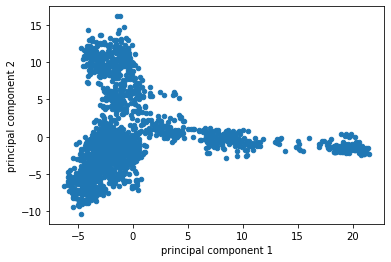

In [29]:
finalDf_M.plot.scatter(x= 'principal component 1', y='principal component 2')

In [30]:
series = pd.value_counts(finalDf_M.scaffold)
mask = (series.lt(10))
finalDf_M['scaffold_grouped'] = np.where(finalDf_M['scaffold'].isin(series[mask].index),'Other',finalDf_M['scaffold'])
#df2.head()

In [31]:
fig_m = px.scatter(finalDf_M, x="principal component 1", y="principal component 2", 
                   color = "scaffold_grouped", symbol='scaffold_grouped',
                   symbol_sequence = symbols,
                   hover_data = ['InChIKey'],
                     color_discrete_map= {'Other': 'lightgrey'
                                         },
                   title = 'PCA on morgan fingerprints after scaling',
                   width=1200, height=800, render_mode='SVG'
                   )
#fig_m.show()
app_scatter = molplotly.add_molecules(fig=fig_m,
                                      df=finalDf_M,
                                      smiles_col='SMILES',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped'
                                      )
app_scatter.run_server(mode='inline', port=9503, height=800)

In [32]:
finalDf_M['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_m_2 = px.scatter(finalDf_M, x="principal component 1", y="principal component 2",
                    color = "pchembl_value_Mean",
                     color_discrete_map= {'Other': 'grey'
                                         },
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,render_mode='SVG',
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'pchembl_value_Mean': 'Activity'},
                    
                    title = 'PCA on morgan fingerprint data after scaling',
                                      width=1000,
                                      height=800)
#fig_m_2.show()
app_scatter = molplotly.add_molecules(fig=fig_m_2,
                                      df=finalDf_M,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9504, height=800)

### PCA on data with morgan fingerprint without transforming

In [33]:
pd.DataFrame(data = a, columns= featuresM).head()

0  1  2  3  4  5  6  7  8  9  ...  1014  1015  1016  1017  1018  1019  \
0  1  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     1   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     1     0     1   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
3  0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     1     0   
4  1  1  0  0  0  0  0  0  1  0  ...     0     0     0     0     0     1   

   1020  1021  1022  1023  
0     0     0     0     0  
1     0     0     0     1  
2     0     0     0     0  
3     0     0     0     0  
4     0     1     0     0  

[5 rows x 1024 columns]

In [34]:
pca_M2 = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_M2 = pca_M2.fit_transform(a)

In [35]:
principalDf_M2 = pd.DataFrame(data = principalComponents_M2
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_M2.head()

principal component 1  principal component 2
0               1.635303              -0.070375
1              -0.468918              -1.178851
2              -1.474940              -0.358292
3              -0.170941              -0.905167
4              -0.198746               3.679145

In [36]:
print(pca_M2.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca_M2.explained_variance_ratio_) # total variance explained by first and second principal component

[4.61505877 3.16717339]
[0.05581301 0.03830276]


In [37]:
finalDf_M2 = pd.concat([principalDf_M2, df_morgan[['InChIKey']], df_morgan[['scaffold']], df[['SMILES']]], axis = 1)
finalDf_M2['scaffold'] = finalDf_M2['scaffold'].astype(str)
finalDf_M2.head(5)

principal component 1  principal component 2                     InChIKey  \
0               1.635303              -0.070375  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1              -0.468918              -1.178851  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2              -1.474940              -0.358292  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3              -0.170941              -0.905167  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4              -0.198746               3.679145  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                            scaffold  \
0  O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...   
1                      O=C(c1cc[nH]c1)C1CCCC2CCCCC21   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...   
3        O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1   
4           O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1   

                                              SMILES  
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...  
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...  
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...  
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...  
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...

In [38]:
series = pd.value_counts(finalDf_M2.scaffold)
mask = (series.lt(10))
finalDf_M2['scaffold_grouped'] = np.where(finalDf_M2['scaffold'].isin(series[mask].index),'Other',finalDf_M2['scaffold'])
#finalDf_M2.head()

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

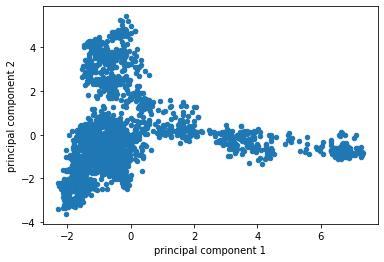

In [39]:
finalDf_M2.plot.scatter(x= 'principal component 1', y='principal component 2')

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

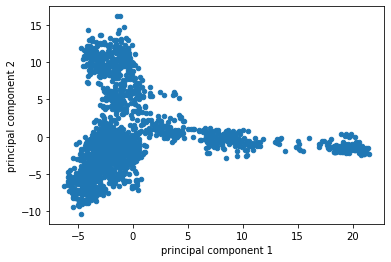

In [40]:
finalDf_M.plot.scatter(x= 'principal component 1', y='principal component 2')

In [41]:
pd.isna(finalDf_M2["scaffold"])

0       False
1       False
2       False
3       False
4       False
        ...  
2177    False
2178    False
2179    False
2180    False
2181    False
Name: scaffold, Length: 2182, dtype: bool

In [42]:
fig_M2 = px.scatter(finalDf_M2, x="principal component 1", y="principal component 2", 
                 color = "scaffold_grouped", symbol='scaffold_grouped',
                 symbol_sequence = symbols,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },render_mode='SVG',
                 title = 'PCA on morgan fingerprint without scaling',width=1200,
                         height=800)


fig_M2.update_layout(plot_bgcolor='White')
       
#fig_M2.show()
app_scatter = molplotly.add_molecules(fig=fig_M2,
                                      df=finalDf_M2,
                                      smiles_col='SMILES',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9505, height=800)

In [43]:
finalDf_M2['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_M2_2 = px.scatter(finalDf_M2, x="principal component 1", y="principal component 2",
                    color = "pchembl_value_Mean",
                    color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'pchembl_value_Mean': 'Activity'},
                    render_mode='SVG',
                    title = 'PCA on morgan fingerprint data without scaling',
                                      width=1000,
                                      height=800)
fig_M2_2.update_layout(plot_bgcolor='White')
#fig_M2_2.show()
app_scatter = molplotly.add_molecules(fig=fig_M2_2,
                                      df=finalDf_M2,
                                      smiles_col='SMILES',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9506, height=800)

# PCA on pharmacophore fingerprint data





### PCA on pharmacophore fingerprint data with scaling

In [44]:
df_PharmFp = pd.read_csv (r'C:\documenten hier\PharmacoFp_ccr5.csv')
#df_PharmFp.head()

In [45]:
featuresPh = list(df_PharmFp.columns.values)
featuresPh.remove('InChIKey')
featuresPh.remove ('scaffold')
featuresPh.remove('smiles')
e = df_PharmFp.loc[ :,featuresPh].values # stores all values as numpy.ndarray
f = df_PharmFp.loc[:,['InChIKey']].values


In [46]:
g = StandardScaler().fit_transform(e)

In [47]:
pd.DataFrame(data = g, columns= featuresPh).head()

0    1    2    3    4    5         6         7          8         9  ...  \
0  0.0  0.0  0.0  0.0  0.0  0.0 -0.030289 -0.093724  -0.064356 -0.143457  ...   
1  0.0  0.0  0.0  0.0  0.0  0.0 -0.030289 -0.093724  15.538483  6.970718  ...   
2  0.0  0.0  0.0  0.0  0.0  0.0 -0.030289 -0.093724  -0.064356 -0.143457  ...   
3  0.0  0.0  0.0  0.0  0.0  0.0 -0.030289 -0.093724  -0.064356 -0.143457  ...   
4  0.0  0.0  0.0  0.0  0.0  0.0 -0.030289 -0.093724  -0.064356 -0.143457  ...   

   39962  39963  39964  39965  39966  39967  39968  39969  39970  39971  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 39972 columns]

In [48]:
pca_Ph = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_Ph = pca_Ph.fit_transform(g)

In [49]:
principalDf_Ph = pd.DataFrame(data = principalComponents_Ph
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_Ph.head()

principal component 1  principal component 2
0              -8.269249             -11.087210
1             -10.853291             124.259627
2             -19.296062              -8.056565
3             -22.027420             -14.007099
4             -17.825138              -9.019958

In [50]:
print(pca_Ph.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca_Ph.explained_variance_ratio_) # total variance explained by first and second principal component

[993.69547186 318.76195846]
[0.08844524 0.02837185]


In [51]:
finalDf_Ph = pd.concat([principalDf_Ph, df_PharmFp[['InChIKey']],df_PharmFp[['scaffold']], df_PharmFp[['smiles']]], axis = 1)
finalDf_Ph['scaffold'] = finalDf_Ph['scaffold'].astype(str)
finalDf_Ph.head(5)


principal component 1  principal component 2                     InChIKey  \
0              -8.269249             -11.087210  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1             -10.853291             124.259627  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2             -19.296062              -8.056565  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3             -22.027420             -14.007099  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4             -17.825138              -9.019958  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                            scaffold  \
0  O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...   
1                      O=C(c1cc[nH]c1)C1CCCC2CCCCC21   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...   
3        O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1   
4           O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1   

                                              smiles  
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...  
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...  
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...  
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...  
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...

In [52]:
series = pd.value_counts(finalDf_Ph.scaffold)
mask = (series.lt(10))
finalDf_Ph['scaffold_grouped'] = np.where(finalDf_Ph['scaffold'].isin(series[mask].index),'Other',finalDf_Ph['scaffold'])
#df2.head()

In [53]:
fig_Ph = px.scatter(finalDf_Ph, x="principal component 1", y="principal component 2", 
                   color = "scaffold_grouped", symbol='scaffold_grouped',
                   symbol_sequence = symbols,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                   title = 'PCA on Pharmacophore fingerprints after scaling',
                   width=1200,
                   height=800,render_mode='SVG')
#fig_Ph.show()
app_scatter = molplotly.add_molecules(fig=fig_Ph,
                                      df=finalDf_Ph,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                     
app_scatter.run_server(mode='inline', port=9507, height=800)


In [54]:
finalDf_Ph['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_Ph_2 = px.scatter(finalDf_Ph, x="principal component 1", y="principal component 2",
                    color = "pchembl_value_Mean",
                      
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'pchembl_value_Mean': 'Activity'},
                    render_mode='SVG',
                    title = 'PCA on pharmacophore fingerprint data after scaling',
                                      width=1000,
                                      height=800)
#fig_Ph_2.show()
app_scatter = molplotly.add_molecules(fig=fig_Ph_2,
                                      df=finalDf_Ph,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                     
app_scatter.run_server(mode='inline', port=9508, height=800)

### PCA on pharmacophore fingerprint data without scaling

In [55]:
pca_Ph2 = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_Ph2 = pca_Ph2.fit_transform(e)

In [56]:
principalDf_Ph2 = pd.DataFrame(data = principalComponents_Ph2
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_Ph2.head()

principal component 1  principal component 2
0              -2.418456              -3.721327
1              -3.606237              -0.564394
2              -8.064714              -4.393341
3              -8.912385              -5.756449
4              -7.462129              -3.654191

In [57]:
print(pca_Ph2.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca_Ph2.explained_variance_ratio_) # total variance explained by first and second principal component

[131.00216462  37.57812231]
[0.21680028 0.06218941]


In [58]:
finalDf_Ph2 = pd.concat([principalDf_Ph2, df_PharmFp[['InChIKey']], df_PharmFp[['scaffold']], df_PharmFp[['smiles']]], axis = 1)
finalDf_Ph2['scaffold'] = finalDf_Ph2['scaffold'].astype(str)
finalDf_Ph2.head(5)

principal component 1  principal component 2                     InChIKey  \
0              -2.418456              -3.721327  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1              -3.606237              -0.564394  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2              -8.064714              -4.393341  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3              -8.912385              -5.756449  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4              -7.462129              -3.654191  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                            scaffold  \
0  O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...   
1                      O=C(c1cc[nH]c1)C1CCCC2CCCCC21   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...   
3        O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1   
4           O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1   

                                              smiles  
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...  
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...  
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...  
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...  
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...

In [59]:
series = pd.value_counts(finalDf_Ph2.scaffold)
mask = (series.lt(10))
finalDf_Ph2['scaffold_grouped'] = np.where(finalDf_Ph2['scaffold'].isin(series[mask].index),'Other',finalDf_Ph2['scaffold'])


In [91]:
fig_Ph2 = px.scatter(finalDf_Ph2, x="principal component 1", y="principal component 2", 
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                   symbol_sequence = symbols,
                     color_discrete_map= {'Other': 'lightgrey'},
                   title = 'PCA on Pharmacophore fingerprints without scaling',
                   width=1200,
                   height=800,render_mode='SVG')
fig_Ph2.update_layout(plot_bgcolor='White')
#fig_Ph2.show()
app_scatter = molplotly.add_molecules(fig=fig_Ph2,
                                      df=finalDf_Ph2,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9509, height=800)

In [92]:
finalDf_Ph2['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_Ph2_2 = px.scatter(finalDf_Ph2, x="principal component 1", y="principal component 2",
                    color = "pchembl_value_Mean",
                       color_discrete_map= {'Other': 'grey'
                                         },
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'pchembl_value_Mean': 'Activity'},
                    
                    title = 'PCA on pharmacophore fingerprint data without scaling',
                                      width=1000,
                                      height=800, render_mode='SVG')
fig_Ph2_2.update_layout(plot_bgcolor='White')
#fig_Ph2_2.show()
app_scatter = molplotly.add_molecules(fig=fig_Ph2_2,
                                      df=finalDf_Ph2,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9510, height=800)

## PCA on learned descriptor data


In [62]:
df_learned = pd.read_csv (r'C:\documenten hier\smiles_1693_ccr5.csv')
df_learned.head()

smiles  \
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...   
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...   
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...   
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...   

                                          new_smiles    cddd_1    cddd_2  \
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2... -0.903264 -0.766287   
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC... -0.471194  0.068009   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc... -0.659260  0.182132   
3  CC(C)Oc1ccc(N2CCN(Cc3ccccc3)CC2)cc1NC(=O)c1cnccn1 -0.786963 -0.298360   
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc... -0.240338  0.766704   

     cddd_3    cddd_4    cddd_5    cddd_6    cddd_7    cddd_8  ...  cddd_505  \
0  0.226449 -0.114073  0.038073 -0.362702  0.072217  0.362048  ...  0.012209   
1 -0.055885 -0.266599  0.191737  0.439582  0.349949 -0.589177  ...  0.612403   
2  0.320758  0.074221  0.438879 -0.451220  0.175096  0.283892  ... -0.535480   
3  0.292103 -0.614560 -0.282243  0.281174 -0.248162  0.725122  ...  0.479439   
4  0.044462  0.342262 -0.621549 -0.347951 -0.794332  0.332911  ... -0.172601   

   cddd_506  cddd_507  cddd_508  cddd_509  cddd_510  cddd_511  cddd_512  \
0 -0.088520 -0.997073 -0.392329  0.633717  0.394993  0.710038  0.448830   
1 -0.409002 -0.999857 -0.189617  0.555575 -0.391759  0.653253 -0.410385   
2 -0.084287 -0.998656  0.212923  0.004113 -0.012009  0.384573  0.476754   
3  0.163803 -0.998665 -0.255546 -0.237816 -0.414820 -0.169452 -0.060087   
4  0.568240 -0.998790  0.183262 -0.077786  0.508723  0.405954 -0.028487   

   Activity                     InChIKey  
0     6.120  AAEHNXBQLULMSR-UHFFFAOYSA-N  
1     5.921  AAEUXJDQWJJVCV-UHFFFAOYSA-N  
2     5.400  AAFIDRUCDKVRAX-UHFFFAOYSA-N  
3     4.990  AANOMZQEAPYXAF-UHFFFAOYSA-N  
4     6.000  AAOGRFLITNLSTM-UHFFFAOYSA-N  

[5 rows x 516 columns]

In [63]:
data_learned = df_learned.drop(['InChIKey', 'smiles', 'new_smiles', 'Activity'], axis=1)
data_learned.head()

cddd_1    cddd_2    cddd_3    cddd_4    cddd_5    cddd_6    cddd_7  \
0 -0.903264 -0.766287  0.226449 -0.114073  0.038073 -0.362702  0.072217   
1 -0.471194  0.068009 -0.055885 -0.266599  0.191737  0.439582  0.349949   
2 -0.659260  0.182132  0.320758  0.074221  0.438879 -0.451220  0.175096   
3 -0.786963 -0.298360  0.292103 -0.614560 -0.282243  0.281174 -0.248162   
4 -0.240338  0.766704  0.044462  0.342262 -0.621549 -0.347951 -0.794332   

     cddd_8    cddd_9   cddd_10  ...  cddd_503  cddd_504  cddd_505  cddd_506  \
0  0.362048  0.593222 -0.315492  ...  0.731825 -0.221394  0.012209 -0.088520   
1 -0.589177  0.063170 -0.586254  ... -0.084148  0.652732  0.612403 -0.409002   
2  0.283892 -0.255405  0.711453  ...  0.412148 -0.191623 -0.535480 -0.084287   
3  0.725122  0.618731  0.341628  ...  0.178653 -0.095828  0.479439  0.163803   
4  0.332911 -0.282462  0.587298  ...  0.773982 -0.307905 -0.172601  0.568240   

   cddd_507  cddd_508  cddd_509  cddd_510  cddd_511  cddd_512  
0 -0.997073 -0.392329  0.633717  0.394993  0.710038  0.448830  
1 -0.999857 -0.189617  0.555575 -0.391759  0.653253 -0.410385  
2 -0.998656  0.212923  0.004113 -0.012009  0.384573  0.476754  
3 -0.998665 -0.255546 -0.237816 -0.414820 -0.169452 -0.060087  
4 -0.998790  0.183262 -0.077786  0.508723  0.405954 -0.028487  

[5 rows x 512 columns]

In [64]:
scaler = StandardScaler()  # not sure if Standard scaler of minmaxScaler should be used, standardscaler seems to make the data more compact. 
data_learned_scaled = scaler.fit_transform(data_learned)

In [65]:
pca = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_learned = pca.fit_transform(data_learned_scaled)

In [66]:
principalDf_learned = pd.DataFrame(data = principalComponents_learned
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_learned.head()

principal component 1  principal component 2
0              -2.844409             -11.231412
1              12.653506               5.127887
2              -2.108829              -0.135695
3               7.589979               1.093222
4               0.253944              -1.840760

In [67]:
finalDf_learned = pd.concat([principalDf_learned, df_learned[['InChIKey']], df_learned[['new_smiles']], df_learned[['smiles']], df_learned[['Activity']]], axis = 1)
finalDf_learned['new_smiles'] = df_learned['new_smiles'].astype(str)
finalDf_learned['smiles'] = df_learned['smiles'].astype(str)
finalDf_learned.head(5)

principal component 1  principal component 2                     InChIKey  \
0              -2.844409             -11.231412  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1              12.653506               5.127887  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2              -2.108829              -0.135695  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3               7.589979               1.093222  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4               0.253944              -1.840760  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                          new_smiles  \
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...   
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...   
3  CC(C)Oc1ccc(N2CCN(Cc3ccccc3)CC2)cc1NC(=O)c1cnccn1   
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...   

                                              smiles  Activity  
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...     6.120  
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...     5.921  
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...     5.400  
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...     4.990  
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...     6.000

In [68]:
print(pca.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca.explained_variance_ratio_) # total variance explained by first and second principal component

[48.6985386  29.87426374]
[0.09505815 0.05831371]


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

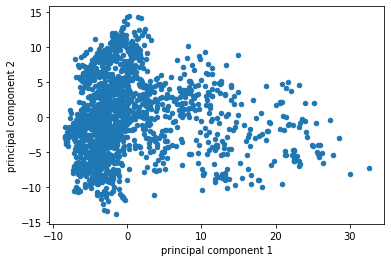

In [69]:
finalDf_learned.plot.scatter(x= 'principal component 1', y='principal component 2')

In [70]:
finalDf_learned["mol"] = finalDf_learned.apply(lambda row: Chem.MolFromSmiles(row['new_smiles']), axis=1)
finalDf_learned["scaffold"] = finalDf_learned.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_learned['scaffold'] = finalDf_learned['scaffold'].astype(str)
finalDf_learned.head()

principal component 1  principal component 2                     InChIKey  \
0              -2.844409             -11.231412  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1              12.653506               5.127887  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2              -2.108829              -0.135695  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3               7.589979               1.093222  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4               0.253944              -1.840760  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                          new_smiles  \
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...   
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...   
3  CC(C)Oc1ccc(N2CCN(Cc3ccccc3)CC2)cc1NC(=O)c1cnccn1   
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...   

                                              smiles  Activity  \
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...     6.120   
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...     5.921   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...     5.400   
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...     4.990   
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...     6.000   

                                                 mol  \
0  <rdkit.Chem.rdchem.Mol object at 0x000001F842E...   
1  <rdkit.Chem.rdchem.Mol object at 0x000001F842E...   
2  <rdkit.Chem.rdchem.Mol object at 0x000001F842E...   
3  <rdkit.Chem.rdchem.Mol object at 0x000001F842E...   
4  <rdkit.Chem.rdchem.Mol object at 0x000001F8063...   

                                            scaffold  
0  O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...  
1                      O=C(c1cc[nH]c1)C1CCCC2CCCCC21  
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...  
3        O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1  
4           O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1

In [135]:
# code used to create same scaffold groups as previously. 
namelist = finalDf['scaffold_grouped'].tolist()
namelist_unique = np.unique(namelist)

namelist2 = finalDf_learned['scaffold'].tolist()
for i in range(len(namelist2)):
    if namelist2[i] not in namelist_unique:
        namelist2[i] = 'Other'
finalDf_learned['scaffold_grouped'] = namelist2
print(namelist_unique)  

['N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3ccc[nH+]c3)CC2)CC1'
 'N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3ccccc3)CC2)CC1'
 'N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3cncnc3)CC2)CC1'
 'O=C(C1CCNCC1)N(CCCN1CCC(Cc2ccccc2)CC1)c1ccccc1'
 'O=C(Cc1ccccc1)NC1CCN(CC2CN(C(=O)C3CCCC3)CC2c2ccccc2)CC1'
 'O=C(Cc1ccccc1)NC1CCN(CCC(NC(=O)C2CCC2)c2ccccc2)CC1'
 'O=C(Cc1ccccc1)NC1CCN(CCC(c2ccccc2)C2CCNCC2)CC1'
 'O=C(Cc1ccccc1)NC1CCN(CCC(c2ccccc2)c2ccccc2)CC1'
 'O=C(NC(CCN1C2CCC1CC(n1cnnc1)C2)c1cccs1)C1CCCCC1'
 'O=C(NC1CCN(CC2CN(C(=O)C3CCCC3)CC2c2ccccc2)CC1)OCc1ccccc1'
 'O=C(NC1CCN(CCC(CNS(=O)(=O)c2ccccc2)c2ccccc2)CC1)OCc1ccccc1'
 'O=C(NCC1CCN(Cc2ccccc2OCc2ccccc2)CC1)Nc1ccccc1'
 'O=C(NCCCN1CCC(C(Oc2ccccn2)c2ccccc2)CC1)c1ccncc1'
 'O=C(NCCCN1CCC(N(Cc2ccccc2)c2ccccc2)CC1)c1ccncc1'
 'O=C(NCCCN1CCC(N(Cc2cccnc2)c2ccccc2)CC1)c1cccnc1'
 'O=C(NCCCN1CCC(N2C(=O)N(C3CCCCC3)CC2c2ccccc2)CC1)c1cncnc1'
 'O=C(NCCCN1CCC(NCc2ccsc2)CC1)c1cccnc1'
 'O=C(NCc1cc(CNC(=O)c2ccccc2)c2[n+](c1)CCC2)c1ccccc1'
 'O=C(NCc1ccccc1)C1CCN(CCCN(C(=O)C2CCNCC2)c2ccccc2)CC1

In [136]:
fig_learned = px.scatter(finalDf_learned, x="principal component 1", y="principal component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                    category_orders={"scaffold_grouped":   ['O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2ccccc2)C1', 'Other', 
'O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1', 'O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1', 'O=C(C1CCNCC1)N(CCCN1CCC(Cc2ccccc2)CC1)c1ccccc1', 
'O=C(NC(CCN1C2CCC1CC(n1cnnc1)C2)c1cccs1)C1CCCCC1', 'c1ccc(Cc2cc(C3CCN(CC4CNCC4c4ccccc4)CC3)[nH]n2)cc1', 'O=C(Cc1ccccc1)NC1CCN(CCC(c2ccccc2)c2ccccc2)CC1', 'O=C(NC1CCN(CCC(CNS(=O)(=O)c2ccccc2)c2ccccc2)CC1)OCc1ccccc1', 'c1ccc(CCCN2C3CCC2CC(n2cnc4c2CNCC4)C3)cc1', 'O=C1CNC(=O)C2(CCN(Cc3ccc(Oc4ccccc4)cc3)CC2)N1', 'O=C(Nc1ccccc1)N(CCCN1C2CCC1CC(n1cnnc1)C2)c1ccccc1', 'O=C1NC2(CCN(Cc3ccc(Oc4ccccc4)cc3)CC2)C(=O)NC1CC1CCCCC1', 'N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3ccccc3)CC2)CC1', 'O=S(=O)(NCC(CCN1CCC2(CC1)C[SH+]c1ccccc12)c1ccccc1)c1ccccc1', 'O=C(c1cncnc1)N1CCC(N2CCN(Cc3ccccc3)CC2)CC1', 'O=C(NCc1cc(CNC(=O)c2ccccc2)c2[n+](c1)CCC2)c1ccccc1', 'O=C(NCCCN1CCC(NCc2ccsc2)CC1)c1cccnc1', 'O=C(Cc1ccccc1)NC1CCN(CCC(c2ccccc2)C2CCNCC2)CC1', 'O=C(Cc1ccccc1)NC1CCN(CCC(NC(=O)C2CCC2)c2ccccc2)CC1', 'O=C(NC1CCN(CC2CN(C(=O)C3CCCC3)CC2c2ccccc2)CC1)OCc1ccccc1', 'c1ccc(C2(CCN3C4CCC3CC(n3cnc5ccccc53)C4)CCNCC2)cc1', 'c1ccc(COc2ccccc2CN2CCCCC2)cc1',  'c1ccc(COc2ccccc2)cc1', 'O=S(=O)(NCC(CCN1CCC(c2ccccc2)CC1)c1ccccc1)c1ccccc1', 'O=C(NCCCN1CCC(C(Oc2ccccn2)c2ccccc2)CC1)c1ccncc1', 'O=C(NCc1ccccc1)NC1CCN(CC2CN(C(=O)C3CCCC3)CC2c2ccccc2)CC1', 'O=C(NCCCN1CCC(N2C(=O)N(C3CCCCC3)CC2c2ccccc2)CC1)c1cncnc1', 'c1ccc(Cc2cc(C3CCN(CC4CN(CC5CCCCC5)CC4c4ccccc4)CC3)[nH]n2)cc1', 'O=C(c1ccccc1)N1CCC(CCN2C3CCC2CC(n2cnc4ccccc42)C3)(c2ccccc2)CC1', 'N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3cncnc3)CC2)CC1', 'O=C(c1cncnc1)N1CC2CN(CCC(c3ccccc3)C3CCNCC3)CC2C1', 'O=C(Nc1cccc(C2CCN(Cc3ccccc3)CC2)c1)c1cnccn1', 'O=C(c1ccccc1)N1CCC(N2CCC(Cc3ccccc3)CC2)CC1', 'O=C(NCCCN1CCC(N(Cc2cccnc2)c2ccccc2)CC1)c1cccnc1', 'O=C(NCc1ccccc1)C1CCN(CCCN(C(=O)C2CCNCC2)c2ccccc2)CC1', 'O=C(c1ccccc1)N1CCC(N2CCN(Cc3ccccc3)CC2)CC1', 'c1cnc2c(c1)ccc1cccnc12', 'O=C(NCCCN1CCC(N(Cc2ccccc2)c2ccccc2)CC1)c1ccncc1', 'N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3ccc[nH+]c3)CC2)CC1', 'O=C(Nc1cccc(C2CCN(Cc3ccccc3)CC2)c1)c1ccccc1',  'O=C(Cc1ccccc1)NC1CCN(CC2CN(C(=O)C3CCCC3)CC2c2ccccc2)CC1', 'c1ccc(CCCC2CCN(CC3CN(CC4CCCCC4)CC3c3ccccc3)CC2)cc1', 'O=C(NCC1CCN(Cc2ccccc2OCc2ccccc2)CC1)Nc1ccccc1']}

                   # size = "Activity",
                   , title = 'PCA on learned descriptor data after scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
fig_learned.update_layout(plot_bgcolor='White')
#fig_learned.show()
app_scatter = molplotly.add_molecules(fig=fig_learned,
                                      df=finalDf_learned,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9511, height=800)


In [100]:
fig_learned_2 = px.scatter(finalDf_learned, x="principal component 1", y="principal component 2",
                    color = "Activity",
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'Activity': 'Activity'},
                    
                    title = 'PCA on learned descriptor data after scaling',
                                      width=1000,
                                      height=800,
                          render_mode='SVG',
                           symbol='scaffold_grouped',
                    symbol_sequence = symbols)
fig_learned_2.update_layout(plot_bgcolor='White')
#fig_learned_2.show()
app_scatter = molplotly.add_molecules(fig=fig_learned_2,
                                      df=finalDf_learned,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9512, height=800)

## PCA on mordred 3D descriptor

In [123]:
df_3D_desc = pd.read_csv (r'C:\documenten hier\ccr5_3D_descriptor_10_numconfs.csv')
df_3D_desc.head()

Mor18se   Mor28se     FNSA4    Mor25m    Mor17m     Mor02v    Mor04p  \
0 -1.177953 -0.054204 -0.012458  0.566132 -0.003595  33.494267  1.696860   
1 -0.989915 -0.774723 -0.013886 -0.097701 -0.354661  26.639330  1.587594   
2 -2.035686 -0.283070 -0.018723  0.409952 -0.313903  28.641956 -0.280446   
3 -1.842067  0.064339 -0.012688  0.738210  0.147899  26.817405 -0.981167   
4 -1.994406 -0.473662 -0.012252  0.550569 -0.592572  19.868230 -2.219696   

         DPSA2   Mor16se   Mor26se  ...        MOMI-Y     Mor22    Mor13m  \
0  1470.571173  0.133943  1.040974  ...  10077.334079  0.104613 -1.478052   
1  2335.660605  0.355136  0.849562  ...   5289.997605 -0.266192 -1.775349   
2  2692.738595  0.143403  1.038425  ...  15502.959757 -0.726655 -1.773591   
3  1949.565532 -0.110287  0.928834  ...  11707.138086 -0.414319 -1.537529   
4  1862.434250  0.370897  0.152804  ...  10499.220699 -0.118736 -1.186662   

      Mor24    Mor03v        MOMI-X       WNSA2      WPSA3    Mor16p  \
0 -0.604978 -5.370738  12951.014139 -450.748189  18.801190 -0.004710   
1  0.037565 -5.500952   6626.848417 -433.095413  23.747330 -0.334972   
2 -0.106205 -5.278343  17672.269354 -902.008112  27.582488 -0.104391   
3 -0.645975 -4.584895  12560.091680 -403.614523  22.016612 -0.269306   
4 -0.037216 -3.340624  10995.544053 -407.727769  21.944492  0.035661   

                      InChIKey  
0  AAEHNXBQLULMSR-UHFFFAOYSA-N  
1  AAEUXJDQWJJVCV-UHFFFAOYSA-N  
2  AAFIDRUCDKVRAX-UHFFFAOYSA-N  
3  AANOMZQEAPYXAF-UHFFFAOYSA-N  
4  AAOGRFLITNLSTM-UHFFFAOYSA-N  

[5 rows x 214 columns]

In [124]:
data_3D = df_3D_desc.drop(['InChIKey'], axis=1)
data_3D_scaled = StandardScaler().fit_transform(data_3D)


In [125]:
pca = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_3D = pca.fit_transform(data_3D_scaled)
print(pca.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca.explained_variance_ratio_) # total variance explained by first and second principal component

[57.33092305 28.14710431]
[0.26903591 0.13208547]


In [126]:
pca_2 = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_3D_without = pca_2.fit_transform(data_3D)
print(pca_2.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca_2.explained_variance_ratio_) # total variance explained by first and second principal component

[1.52356515e+08 4.08993496e+06]
[0.95997675 0.0257701 ]


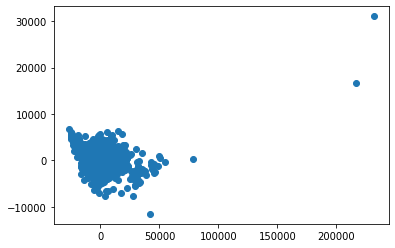

In [127]:
plt.scatter(principalComponents_3D_without[:,0], principalComponents_3D_without[:,1]) #first plot of data without scaling


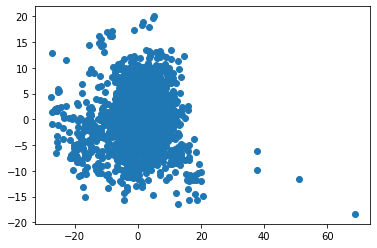

In [128]:
plt.scatter(principalComponents_3D[:,0], principalComponents_3D[:,1]) #first plot of data after scaling

In [129]:
principalDf_3D_scaled = pd.DataFrame(data = principalComponents_3D
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_3D_scaled.head()

principal component 1  principal component 2
0              -6.196050               0.946529
1              -4.165847               7.298221
2              -2.018569              -4.726202
3              -6.872790              -3.004034
4              -6.767327               0.810261

In [130]:
df_ccr2 = pd.read_csv (r'C:\documenten hier\ccr5_data.csv')
finalDf_3D_scaled = pd.concat([principalDf_3D_scaled, df_3D_desc[['InChIKey']]], axis = 1)
finalDf_3D_scaled['smiles'] = df_ccr2['SMILES']
finalDf_3D_scaled['smiles'] = finalDf_3D_scaled['smiles'].astype(str)
finalDf_3D_scaled['Activity'] = df_ccr2['pchembl_value_Mean']

finalDf_3D_scaled.head(5)

principal component 1  principal component 2                     InChIKey  \
0              -6.196050               0.946529  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1              -4.165847               7.298221  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2              -2.018569              -4.726202  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3              -6.872790              -3.004034  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4              -6.767327               0.810261  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                              smiles  Activity  
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...     6.120  
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...     5.921  
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...     5.400  
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...     4.990  
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...     6.000

In [131]:
finalDf_3D_scaled["mol"] = finalDf_3D_scaled.apply(lambda row: Chem.MolFromSmiles(row['smiles']), axis=1)
finalDf_3D_scaled["scaffold"] = finalDf_3D_scaled.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_3D_scaled['scaffold'] = finalDf_3D_scaled['scaffold'].astype(str)

#group compounds with the same scaffold
series = pd.value_counts(finalDf_3D_scaled.scaffold)
mask = (series.lt(10))
finalDf_3D_scaled['scaffold_grouped'] = np.where(finalDf_3D_scaled['scaffold'].isin(series[mask].index),'Other',finalDf_3D_scaled['scaffold'])

finalDf_3D_scaled.head()

principal component 1  principal component 2                     InChIKey  \
0              -6.196050               0.946529  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1              -4.165847               7.298221  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2              -2.018569              -4.726202  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3              -6.872790              -3.004034  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4              -6.767327               0.810261  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                              smiles  Activity  \
0  O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...     6.120   
1  CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...     5.921   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...     5.400   
3  CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...     4.990   
4  COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...     6.000   

                                                 mol  \
0  <rdkit.Chem.rdchem.Mol object at 0x000001F859C...   
1  <rdkit.Chem.rdchem.Mol object at 0x000001F859C...   
2  <rdkit.Chem.rdchem.Mol object at 0x000001F859C...   
3  <rdkit.Chem.rdchem.Mol object at 0x000001F859C...   
4  <rdkit.Chem.rdchem.Mol object at 0x000001F859C...   

                                            scaffold  \
0  O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...   
1                      O=C(c1cc[nH]c1)C1CCCC2CCCCC21   
2  O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...   
3        O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1   
4           O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1   

                                    scaffold_grouped  
0  O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...  
1                                              Other  
2                                              Other  
3        O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1  
4           O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1

In [132]:
fig_3D = px.scatter(finalDf_3D_scaled, x="principal component 1", y="principal component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                   # size = "Activity",
                    title = 'PCA on 3D descriptor data after scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
fig_3D.update_layout(plot_bgcolor='White')
#fig_3D.show()
app_scatter = molplotly.add_molecules(fig=fig_3D,
                                      df=finalDf_3D_scaled,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9513, height=800)

In [134]:
fig_3D_2 = px.scatter(finalDf_3D_scaled, x="principal component 1", y="principal component 2",
                    color = "Activity",
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'Activity': 'Activity'},
                    
                    title = 'PCA on 3D descriptor data after scaling',
                                      width=1000,
                                      height=800,
                          render_mode='SVG',
                          # symbol='scaffold_grouped',
                    symbol_sequence = symbols)
fig_3D_2.update_layout(plot_bgcolor='White')
#fig_3D_2.show()
app_scatter = molplotly.add_molecules(fig=fig_3D_2,
                                      df=finalDf_3D_scaled,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9514, height=800)

### 3D descriptor without scaling

In [86]:
principalDf_3D = pd.DataFrame(data = principalComponents_3D_without
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_3D.head()

principal component 1  principal component 2
0           -8065.769110             945.287042
1          -16317.055989           -1493.907119
2              26.014992           -2764.562588
3          -10210.002251             827.766843
4           -9182.639604             513.091398

In [87]:
df_ccr2 = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
finalDf_3D = pd.concat([principalDf_3D, df_3D_desc[['InChIKey']]], axis = 1)
finalDf_3D['smiles'] = df_ccr2['SMILES']
finalDf_3D['smiles'] = finalDf_3D['smiles'].astype(str)
finalDf_3D['Activity'] = df_ccr2['pchembl_value_Mean']

finalDf_3D.head(5)

principal component 1  principal component 2                     InChIKey  \
0           -8065.769110             945.287042  AAEHNXBQLULMSR-UHFFFAOYSA-N   
1          -16317.055989           -1493.907119  AAEUXJDQWJJVCV-UHFFFAOYSA-N   
2              26.014992           -2764.562588  AAFIDRUCDKVRAX-UHFFFAOYSA-N   
3          -10210.002251             827.766843  AANOMZQEAPYXAF-UHFFFAOYSA-N   
4           -9182.639604             513.091398  AAOGRFLITNLSTM-UHFFFAOYSA-N   

                                              smiles  Activity  
0  CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...      7.89  
1     O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1      5.00  
2  O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...      6.19  
3  COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...      7.20  
4  CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...      8.46

In [90]:
finalDf_3D["mol"] = finalDf_3D.apply(lambda row: Chem.MolFromSmiles(row['smiles']), axis=1)
finalDf_3D["scaffold"] = finalDf_3D.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_3D['scaffold'] = finalDf_3D['scaffold'].astype(str)

#group compounds with the same scaffold
series = pd.value_counts(finalDf_3D.scaffold)
mask = (series.lt(10))
finalDf_3D['scaffold_grouped'] = np.where(finalDf_3D['scaffold'].isin(series[mask].index),'Other',finalDf_3D['scaffold'])

finalDf_3D.head()

KeyError: 'scaffold'

In [ ]:
fig_3D_without = px.scatter(finalDf_3D, x="principal component 1", y="principal component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                   # size = "Activity",
                    title = 'PCA on 3D descriptor data without scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
#fig_3D_without.show()
app_scatter = molplotly.add_molecules(fig=fig_3D_without,
                                      df=finalDf_3D,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9515, height=800)